# Análisis de Dr. Scratch  

<p> Se ha de realizar un análisis previo y general sobre los datos obtenidos a partir de los distintos proyectos .sb3.</p> 
<p> Se indican a continuación cuáles son las puntuaciones que se consiguen en cada proyecto, para cada una de las 7 habilidades analizadas del pensamiento computacional.</p>

Lo primero será importar las librerías necesarias y cargar los datos proporcionados en resultados.csv. Con ello obtenemos el siguiente dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df_analyzer = pd.read_csv("resultados.csv")
df_analyzer.head()

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,12002214_2019_11_27_14_26_43_941914.sb3,0,0.000000,Basic,0,0,0,0,0,0,0
1,120039229_2019_12_24_06_12_25_867981.sb3,13,1.857143,Developing,1,2,3,1,1,2,3
2,1202324_2020_06_16_08_40_16_613045.sb3,14,2.000000,Developing,3,3,2,1,2,2,1
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.571429,Proficiency,3,3,3,1,3,2,3
4,120406791_2020_10_04_06_51_35_316448.sb3,5,0.714286,Basic,0,2,0,1,1,1,0


En el dataframe df_analyzer, se recogen las puntuaciones obtenidas para cada proyecto. Además del total y la media, podemos ver la puntuación específica para cada una de las siete habilidades que reflejan el pensamiento computacional. Se puntúan de 0 a 3. Para obtener información sobre el tipo de estas variables o columnas:

In [4]:
df_analyzer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Project             100 non-null    object 
 1   Total               100 non-null    int64  
 2   Average             100 non-null    float64
 3   Level               100 non-null    object 
 4   Abstraction         100 non-null    int64  
 5   Parallelization     100 non-null    int64  
 6   Logic               100 non-null    int64  
 7   Synchronization     100 non-null    int64  
 8   Flow Control        100 non-null    int64  
 9   UserInteractivity   100 non-null    int64  
 10  DataRepresentation  100 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 8.7+ KB


Cada una de las variables del pensamiento computacional son enteros. Su suma da el total, que también es de tipo entero. La media obtenida para cada proyecto es de tipo float64. A partir de ahí, se obtiene cuál es el nivel para cada proyecto, que se agrupa en tres categorías en función de la puntuación total.
Además se observa que no hay ningún campo vacío en la tabla.

Si queremos que la columna Level sea una variable categórica:

In [5]:
df_analyzer["Level"] = pd.Categorical(df_analyzer["Level"])
df_analyzer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Project             100 non-null    object  
 1   Total               100 non-null    int64   
 2   Average             100 non-null    float64 
 3   Level               100 non-null    category
 4   Abstraction         100 non-null    int64   
 5   Parallelization     100 non-null    int64   
 6   Logic               100 non-null    int64   
 7   Synchronization     100 non-null    int64   
 8   Flow Control        100 non-null    int64   
 9   UserInteractivity   100 non-null    int64   
 10  DataRepresentation  100 non-null    int64   
dtypes: category(1), float64(1), int64(8), object(1)
memory usage: 8.2+ KB


Se puede representar la puntuación media solamente con dos decimales, gracias a la siguiente instrucción.

In [6]:
#pd.set_option("display.precision", 2)
pd.set_option('display.float_format', '{:.2f}'.format)

Ahora se trata de extraer más información del dataset. Consta de 100 filas o proyectos y 11 columnas, con los datos de interés.

In [7]:
df_analyzer.shape

(100, 11)

Otras formas de acceder a la información sobre las filas y las columnas, se presenta a continuación.

In [8]:
df_analyzer.index

RangeIndex(start=0, stop=100, step=1)

In [9]:
df_analyzer.axes[0] # Índice de filas

RangeIndex(start=0, stop=100, step=1)

In [10]:
df_analyzer.columns #También se puede df_analyzer.keys()

Index(['Project', 'Total', 'Average', 'Level', 'Abstraction',
       'Parallelization', 'Logic', 'Synchronization', 'Flow Control',
       'UserInteractivity', 'DataRepresentation'],
      dtype='object')

In [11]:
df_analyzer.axes[1] # Índice de columnas

Index(['Project', 'Total', 'Average', 'Level', 'Abstraction',
       'Parallelization', 'Logic', 'Synchronization', 'Flow Control',
       'UserInteractivity', 'DataRepresentation'],
      dtype='object')

**Estadística descriptiva básica para las variables numéricas**.

A continuación obtenemos el resumen estadístico de los datos teniendo en cuenta los 100 proyectos analizados. La mayor puntuación media se obtiene para paralelización. La desviación estándar presenta valores elevados en cada área del pensamiento computacional (CT) para un rango de valores de la variable de 0 a 3, presentando su valor mayor de dispersión en lógica. En un 75% de las ocasiones los proyectos no superan los 15 puntos totales en cuanto a pensamiento computacional.

In [12]:
df_analyzer.describe()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,10.52,1.50,1.30,1.75,1.63,1.23,1.47,1.57,1.57
std,6.08,0.87,1.22,0.96,1.26,1.08,0.83,0.78,1.27
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.00,0.71,0.00,1.75,0.00,0.00,1.00,1.75,0.00
50%,13.00,1.86,1.00,2.00,2.00,1.00,2.00,2.00,2.00
75%,15.00,2.14,3.00,2.00,3.00,2.00,2.00,2.00,3.00
max,19.00,2.71,3.00,3.00,3.00,3.00,3.00,2.00,3.00


El resumen estadístico para las variables no numéricas nos indica de nuevo que hay 100 proyectos únicos en la muestra.

In [13]:
df_analyzer.describe(include=object)

,Project
count,100
unique,100
top,123142330_2020_03_02_14_38_01_469193.sb3
freq,1


<p> Los proyectos ordenados de mayor a menor puntuación total, y por lo tanto de mayor a menor puntuación media, son: </p>

In [14]:
df_analyzer.sort_values(by='Total', ascending = False)

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
45,123259467_2019_12_24_06_14_24_921337.sb3,19,2.71,Proficiency,3,3,3,2,3,2,3
43,123142330_2020_03_02_14_38_01_469193.sb3,18,2.57,Proficiency,3,3,2,3,2,2,3
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.57,Proficiency,3,3,3,1,3,2,3
37,12239450_2020_11_17_16_59_31_702345.sb3,17,2.43,Proficiency,3,2,3,2,2,2,3
35,1223_2020_02_03_15_09_27_783332.sb3,17,2.43,Proficiency,3,2,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
46,123259467_2020_03_29_22_08_17_838940.sb3,0,0.00,Basic,0,0,0,0,0,0,0
48,123355627_2019_11_19_14_22_42_147655.sb3,0,0.00,Basic,0,0,0,0,0,0,0
49,123355627_2019_11_19_14_22_52_525660.sb3,0,0.00,Basic,0,0,0,0,0,0,0
74,1234567890_2020_02_26_08_37_16_715808.sb3,0,0.00,Basic,0,0,0,0,0,0,0


El nº de proyectos con puntuación baja (Level: Basic), media (Level= Developing) y alta (Level: Profeciency) son:

In [15]:
df_analyzer["Level"].value_counts(ascending=False)

Proficiency    43
Basic          30
Developing     27
Name: Level, dtype: int64

In [16]:
df_analyzer["Level"].value_counts(normalize=True)

Proficiency   0.43
Basic         0.30
Developing    0.27
Name: Level, dtype: float64

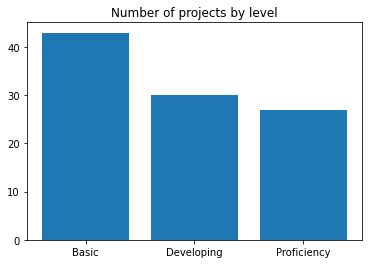

In [17]:
values = df_analyzer["Level"].value_counts()
names = df_analyzer.Level.unique()
plt.bar(names, values)
plt.title("Number of projects by level")
plt.show()

Así se obtiene el gráfico de distribución por nivel.

In [18]:
df_analyzer["Level"].unique()

['Basic', 'Developing', 'Proficiency']
Categories (3, object): ['Basic', 'Developing', 'Proficiency']

Una forma de filtrar por nivel para luego poder visualizar los proyectos de nivel básico, por ejemplo:

In [19]:
filt = df_analyzer['Level'].str.contains('Basic', na=False)
df_analyzer.loc[filt]

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,12002214_2019_11_27_14_26_43_941914.sb3,0,0.00,Basic,0,0,0,0,0,0,0
4,120406791_2020_10_04_06_51_35_316448.sb3,5,0.71,Basic,0,2,0,1,1,1,0
7,120534515_2020_03_29_21_45_24_871377.sb3,0,0.00,Basic,0,0,0,0,0,0,0
12,12115110_2020_01_08_20_14_14_558772.sb3,0,0.00,Basic,0,0,0,0,0,0,0
13,12115110_2020_01_08_20_14_28_244141.sb3,0,0.00,Basic,0,0,0,0,0,0,0
15,121180931_2020_10_28_18_25_00_679248.sb3,0,0.00,Basic,0,0,0,0,0,0,0
20,121595381_2021_02_01_12_18_25_550087.sb3,7,1.00,Basic,0,2,0,1,1,2,1
23,121712839_2020_01_17_11_37_54_207556.sb3,0,0.00,Basic,0,0,0,0,0,0,0
24,121712839_2020_01_17_11_38_07_079322.sb3,0,0.00,Basic,0,0,0,0,0,0,0
25,121712839_2020_01_17_11_38_33_619453.sb3,0,0.00,Basic,0,0,0,0,0,0,0


Ahora se extrae el nº total de proyectos almacenados con puntuación total de 0.

In [20]:
# Proyectos con puntuación total 0
sum(df_analyzer.Total==0)

18

De este modo, solo seleccionamos algunas de las columnas.

In [21]:
df_analyzer.loc[:10, ["Abstraction","DataRepresentation"]]

,Abstraction,DataRepresentation
0,0,0
1,1,3
2,3,1
3,3,3
4,0,0
5,1,3
6,1,3
7,0,0
8,3,2
9,3,3


Para visualizar los proyectos que cuentan con una paralelización = 3. Del mismo modo se podría hacer para cada CT y puntuación.

In [22]:
df = df_analyzer.groupby(["Parallelization"])
df.get_group(3)

,Project,Total,Average,Level,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
2,1202324_2020_06_16_08_40_16_613045.sb3,14,2.00,Developing,3,3,2,1,2,2,1
3,12027518_2021_01_13_13_37_57_574946.sb3,18,2.57,Proficiency,3,3,3,1,3,2,3
8,1208699_2020_05_19_01_18_19_238119.sb3,17,2.43,Proficiency,3,3,3,1,3,2,2
21,121658969_2021_05_25_17_42_00_468328.sb3,16,2.29,Proficiency,3,3,2,1,2,2,3
22,121658969_2021_05_25_21_26_56_760288.sb3,16,2.29,Proficiency,3,3,2,1,2,2,3
40,122770615_2020_02_13_08_46_31_801452.sb3,14,2.00,Developing,2,3,3,1,2,2,1
41,122770615_2020_02_20_01_32_33_815862.sb3,14,2.00,Developing,2,3,3,1,2,2,1
42,122770615_2020_02_20_15_11_56_406221.sb3,14,2.00,Developing,2,3,3,1,2,2,1
43,123142330_2020_03_02_14_38_01_469193.sb3,18,2.57,Proficiency,3,3,2,3,2,2,3
45,123259467_2019_12_24_06_14_24_921337.sb3,19,2.71,Proficiency,3,3,3,2,3,2,3


Para filtrar haciendo que cada CT cumpla determinadas condiciones se procede:

In [23]:
((df_analyzer["Logic"]>2)&(df_analyzer["Parallelization"]<=2))

0     False
1      True
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

Para ver la puntuación obtenida para cada CT y obtener su distribución se realiza lo siguiente.

In [24]:
df_analyzer["Abstraction"].value_counts(ascending=False)

0    35
1    28
3    28
2     9
Name: Abstraction, dtype: int64

array([[<AxesSubplot:title={'center':'Abstraction'}>]], dtype=object)

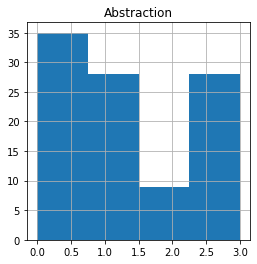

In [25]:
df_analyzer.hist(bins=4,column="Abstraction",figsize=(4,4))

<AxesSubplot:xlabel='Abstraction', ylabel='Count'>

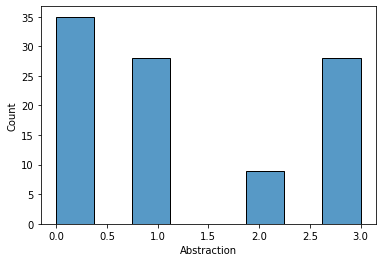

In [26]:
sns.histplot(df_analyzer["Abstraction"])

En estos caso vemos la distribución de abstracción y lógica con respecto a los puntos obtenidos. Se procede de manera similar para cada CT.

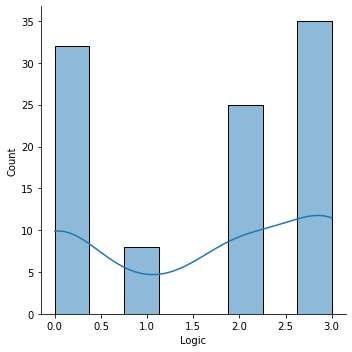

In [27]:
sns.displot(df_analyzer["Logic"],kde=True)

In [28]:
df_analyzer.select_dtypes(include=np.number)

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0.00,0,0,0,0,0,0,0
1,13,1.86,1,2,3,1,1,2,3
2,14,2.00,3,3,2,1,2,2,1
3,18,2.57,3,3,3,1,3,2,3
4,5,0.71,0,2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
95,5,0.71,0,1,0,0,2,2,0
96,5,0.71,0,1,0,0,2,2,0
97,6,0.86,0,1,0,1,2,2,0
98,5,0.71,0,1,0,0,2,2,0


Para seleccionar las 7 habilidades del pensamiento computacional (CT):

In [29]:
df_analyzer.iloc[-10:,4:] # Solo las últomas filas

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
90,0,2,0,0,1,1,0
91,0,2,0,0,1,1,0
92,0,2,0,0,1,1,0
93,0,2,0,1,1,1,0
94,0,1,0,0,2,2,0
95,0,1,0,0,2,2,0
96,0,1,0,0,2,2,0
97,0,1,0,1,2,2,0
98,0,1,0,0,2,2,0
99,0,1,0,0,2,2,0


También se puede hacer, seleccionando todas las filas:

In [30]:
df_ct = df_analyzer.loc[:, "Abstraction":"DataRepresentation"]
df_ct

,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0,0,0,0,0,0
1,1,2,3,1,1,2,3
2,3,3,2,1,2,2,1
3,3,3,3,1,3,2,3
4,0,2,0,1,1,1,0
...,...,...,...,...,...,...,...
95,0,1,0,0,2,2,0
96,0,1,0,0,2,2,0
97,0,1,0,1,2,2,0
98,0,1,0,0,2,2,0


Con ello visualizamos solo las variables numéricas del dataframe. A continuación se analiza cómo se distribuye la puntuación para cada CT.

In [76]:
df_ct = df_analyzer.loc[:, "Abstraction":"DataRepresentation"]
for column in df_ct: 
    print(df_analyzer.value_counts(column))

<bound method IndexOpsMixin.tolist of Abstraction
0    35
1    28
3    28
2     9
dtype: int64>
<bound method IndexOpsMixin.tolist of Parallelization
2    57
0    18
3    18
1     7
dtype: int64>
<bound method IndexOpsMixin.tolist of Logic
3    35
0    32
2    25
1     8
dtype: int64>
<bound method IndexOpsMixin.tolist of Synchronization
1    48
0    26
3    23
2     3
dtype: int64>
<bound method IndexOpsMixin.tolist of Flow Control
2    57
1    21
0    18
3     4
dtype: int64>
<bound method IndexOpsMixin.tolist of UserInteractivity
2    75
0    18
1     7
dtype: int64>
<bound method IndexOpsMixin.tolist of DataRepresentation
3    37
0    31
1    18
2    14
dtype: int64>


Así podemos ver las puntuaciones para cada habilidad del pensamiento computacional. Se presentan a continuación de manera gráfica.

<AxesSubplot:xlabel='Average', ylabel='Count'>

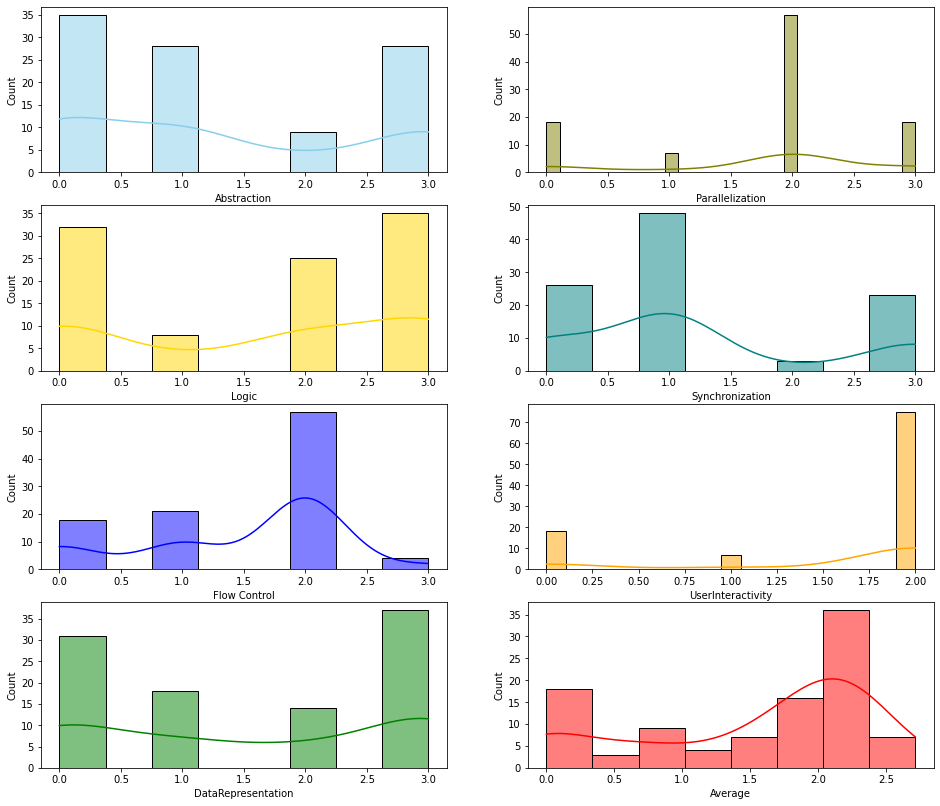

In [87]:
fig, axs = plt.subplots(4, 2, figsize=(16, 14))
sns.histplot(data=df_analyzer, x="Abstraction", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_analyzer, x="Parallelization", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_analyzer, x="Logic", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_analyzer, x="Synchronization", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_analyzer, x="Flow Control", kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df_analyzer, x="UserInteractivity", kde=True, color="orange", ax=axs[2, 1])
sns.histplot(data=df_analyzer, x="DataRepresentation", kde=True, color="green", ax=axs[3, 0])
sns.histplot(data=df_analyzer, x="Average", kde=True, color="red", ax=axs[3, 1])

# Análisis estadístico

A continuación se procede a realizar una revisión de los estadísticos principales. Calculamos la media y la mediana como medidas de centralización.

In [86]:
#Tendencia central
df_analyzer.mean()

Total                10.52
Average               1.50
Abstraction           1.30
Parallelization       1.75
Logic                 1.63
Synchronization       1.23
Flow Control          1.47
UserInteractivity     1.57
DataRepresentation    1.57
dtype: float64

Los mayores promedios se consiguen en lógica y paralelización.

In [34]:
#Tendencia central
df_analyzer.median()

Total                13.00
Average               1.86
Abstraction           1.00
Parallelization       2.00
Logic                 2.00
Synchronization       1.00
Flow Control          2.00
UserInteractivity     2.00
DataRepresentation    2.00
dtype: float64

A partir de la mediana destaca el hecho de que la mitad de los proyectos sólo tienen un valor de 0 o 1  en abtracción y en sincronización. Coincide con el segundo cuartil y el percentil 50%. para el resto de habilidades en cuanto a pensamiento computacional la mediana se sitúa en 2 puntos. es una medida central más representativa cuando las puntuaciones presentan desviaciones en torno a la media.

In [84]:
# Percentil: Valor que no se supera en un 50% de los proyectos
df_analyzer.quantile(0.5)

Total                13.00
Average               1.86
Abstraction           1.00
Parallelization       2.00
Logic                 2.00
Synchronization       1.00
Flow Control          2.00
UserInteractivity     2.00
DataRepresentation    2.00
Name: 0.5, dtype: float64

In [85]:
# Percentil: Valor que no se supera en un 60% de los proyectos
df_analyzer.quantile(0.6)

Total                15.00
Average               2.14
Abstraction           1.00
Parallelization       2.00
Logic                 2.00
Synchronization       1.00
Flow Control          2.00
UserInteractivity     2.00
DataRepresentation    2.00
Name: 0.6, dtype: float64

Representamos a continuación el diagrama de cajas. El rango intercuartílico es muy estrecho en la interactividad del usuario y en paralelización. El primer y el tercer cuartil prácticamente coinciden con la mediana en los 2 puntos conseguidos por el proyecto, llegando a considerarse otras puntuaciones como datos atípicos. 

Tanto en lógica como en representación de los datos las diferencias entre el primer y el tercer cuartil son similares y la mediana se sitúa en los 2 puntos.

En abstracción la mediana se encuentra en 1 punto, dejando arriba y abajo el mismo nº de proyectos. La diferencia entere el tercer y el primer cuartil, se corresponde con todo el rango de valores posibles, de modo que el 75% de los proyectos ha alcanzado los tres puntos en esta habilidad.

En sincronización la puntuación que deja a derechas e izquierdas el 50% de puntuaciones de los proyectos o mediana está en un punto. El primer cuartil está en un punto y el tercer cuartil está en 2 puntos para los proyectos.

El rango intercuatílico es más estrecho para el control de flujo del programa. la mediana coincide con el tercer cuartil en 2 puntos. El 25% de los proyectos tienen una puntuación de 1 punto.

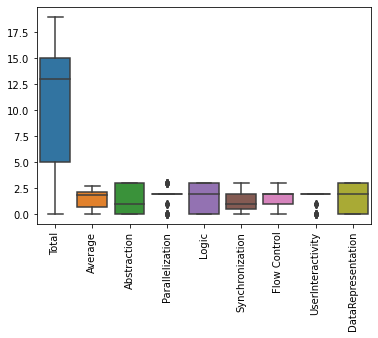

In [88]:
sns.boxplot(data=df_analyzer)
plt.xticks(rotation=90);

In [36]:
df_analyzer.var()

Total                36.96
Average               0.75
Abstraction           1.48
Parallelization       0.92
Logic                 1.59
Synchronization       1.17
Flow Control          0.70
UserInteractivity     0.61
DataRepresentation    1.62
dtype: float64

In [37]:
df_analyzer.std()

Total                6.08
Average              0.87
Abstraction          1.22
Parallelization      0.96
Logic                1.26
Synchronization      1.08
Flow Control         0.83
UserInteractivity    0.78
DataRepresentation   1.27
dtype: float64

Al calcular la varianza y la desviación típica, vemos que la dispersión en torno a la media de cada habilidad del CT es bastante elevada para los valores de puntuación posibles (0,1,2,3). La interactividad y el flujo de control del programa analizados en los proyectos presentan valores más concentrados en torno a la media.

A continuación se busca si existe relación y dependencia entre cada par de variables que representan cada área del CT y entre éstas y el total. Para ello se calculan covarianza y correlación.

In [38]:
df_analyzer.cov()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Total,36.96,5.28,5.82,5.09,6.67,4.64,4.16,4.08,6.50
Average,5.28,0.75,0.83,0.73,0.95,0.66,0.59,0.58,0.93
Abstraction,5.82,0.83,1.48,0.79,1.07,0.44,0.62,0.54,0.88
Parallelization,5.09,0.73,0.79,0.92,0.86,0.55,0.63,0.62,0.72
Logic,6.67,0.95,1.07,0.86,1.59,0.63,0.62,0.67,1.23
Synchronization,4.64,0.66,0.44,0.55,0.63,1.17,0.50,0.45,0.90
Flow Control,4.16,0.59,0.62,0.63,0.62,0.50,0.70,0.57,0.53
UserInteractivity,4.08,0.58,0.54,0.62,0.67,0.45,0.57,0.61,0.62
DataRepresentation,6.50,0.93,0.88,0.72,1.23,0.90,0.53,0.62,1.62


<AxesSubplot:>

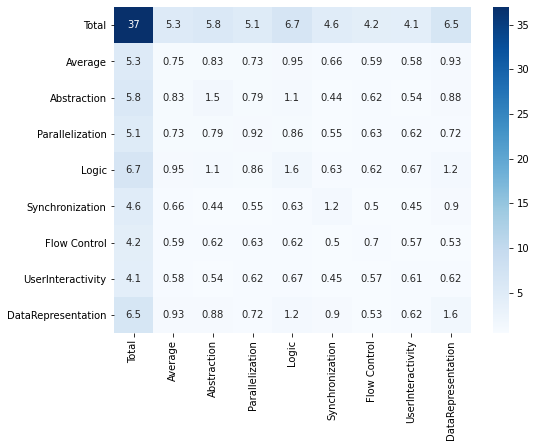

In [39]:
plt.figure(figsize=(8,6))
cov_matrix= df_analyzer.cov()
sns.heatmap(cov_matrix, annot= True, cmap='Blues')

In [40]:
df_analyzer.corr()

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
Total,1.00,1.00,0.79,0.87,0.87,0.71,0.82,0.86,0.84
Average,1.00,1.00,0.79,0.87,0.87,0.71,0.82,0.86,0.84
Abstraction,0.79,0.79,1.00,0.68,0.70,0.33,0.61,0.57,0.57
Parallelization,0.87,0.87,0.68,1.00,0.71,0.53,0.79,0.83,0.59
Logic,0.87,0.87,0.70,0.71,1.00,0.46,0.59,0.68,0.77
Synchronization,0.71,0.71,0.33,0.53,0.46,1.00,0.55,0.54,0.65
Flow Control,0.82,0.82,0.61,0.79,0.59,0.55,1.00,0.87,0.50
UserInteractivity,0.86,0.86,0.57,0.83,0.68,0.54,0.87,1.00,0.62
DataRepresentation,0.84,0.84,0.57,0.59,0.77,0.65,0.50,0.62,1.00


<AxesSubplot:>

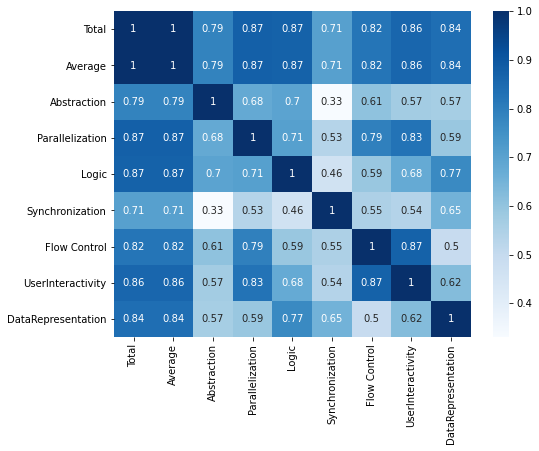

In [41]:
plt.figure(figsize=(8,6))
#sns.set_context('paper', font_scale=1.4)
corr_matrix= df_analyzer.corr()
sns.heatmap(corr_matrix, annot= True, cmap='Blues')

In [42]:
# Correlación de cada CT con la puntuación total.
df_analyzer.corrwith(df_analyzer["Total"])

Total                1.00
Average              1.00
Abstraction          0.79
Parallelization      0.87
Logic                0.87
Synchronization      0.71
Flow Control         0.82
UserInteractivity    0.86
DataRepresentation   0.84
dtype: float64

In [45]:
df = df_analyzer.select_dtypes(include=np.number).cumsum()
df

,Total,Average,Abstraction,Parallelization,Logic,Synchronization,Flow Control,UserInteractivity,DataRepresentation
0,0,0.00,0,0,0,0,0,0,0
1,13,1.86,1,2,3,1,1,2,3
2,27,3.86,4,5,5,2,3,4,4
3,45,6.43,7,8,8,3,6,6,7
4,50,7.14,7,10,8,4,7,7,7
...,...,...,...,...,...,...,...,...,...
95,1031,147.29,130,171,163,122,139,149,157
96,1036,148.00,130,172,163,122,141,151,157
97,1042,148.86,130,173,163,123,143,153,157
98,1047,149.57,130,174,163,123,145,155,157


In [46]:
df_plot_cumsum = df.loc[:, "Abstraction":"DataRepresentation"]

<AxesSubplot:>

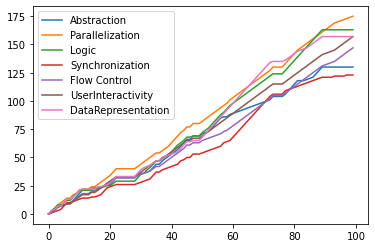

In [47]:
df_plot_cumsum.plot()

In [48]:
df_plot = df_analyzer.loc[:, "Abstraction":"DataRepresentation"]

<AxesSubplot:>

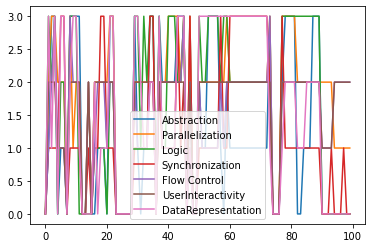

In [49]:
df_plot.plot()

Para cada par de habilidades de CT, obtenemos las nubes de puntos. No hay una relación directa aparente.

Text(0, 0.5, 'Abstraction')

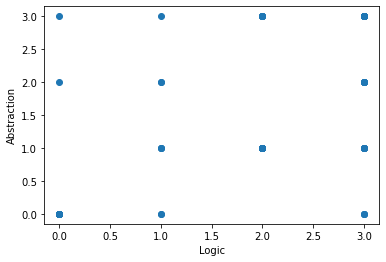

In [50]:
plt.scatter(df_analyzer['Logic'], df_analyzer['Abstraction'])
plt.xlabel("Logic")
plt.ylabel('Abstraction')

In [51]:
pd.notnull(df_analyzer).count()

Project               100
Total                 100
Average               100
Level                 100
Abstraction           100
Parallelization       100
Logic                 100
Synchronization       100
Flow Control          100
UserInteractivity     100
DataRepresentation    100
dtype: int64

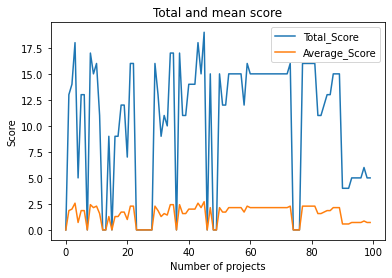

In [57]:
plt.plot(df_analyzer.index, df_analyzer.Total,label="Total_Score")
plt.plot(df_analyzer.index, df_analyzer.Average, label="Average_Score")
plt.xlabel("Number of projects")
plt.ylabel("Score")
plt.title("Total and mean score")
plt.legend()
plt.show()

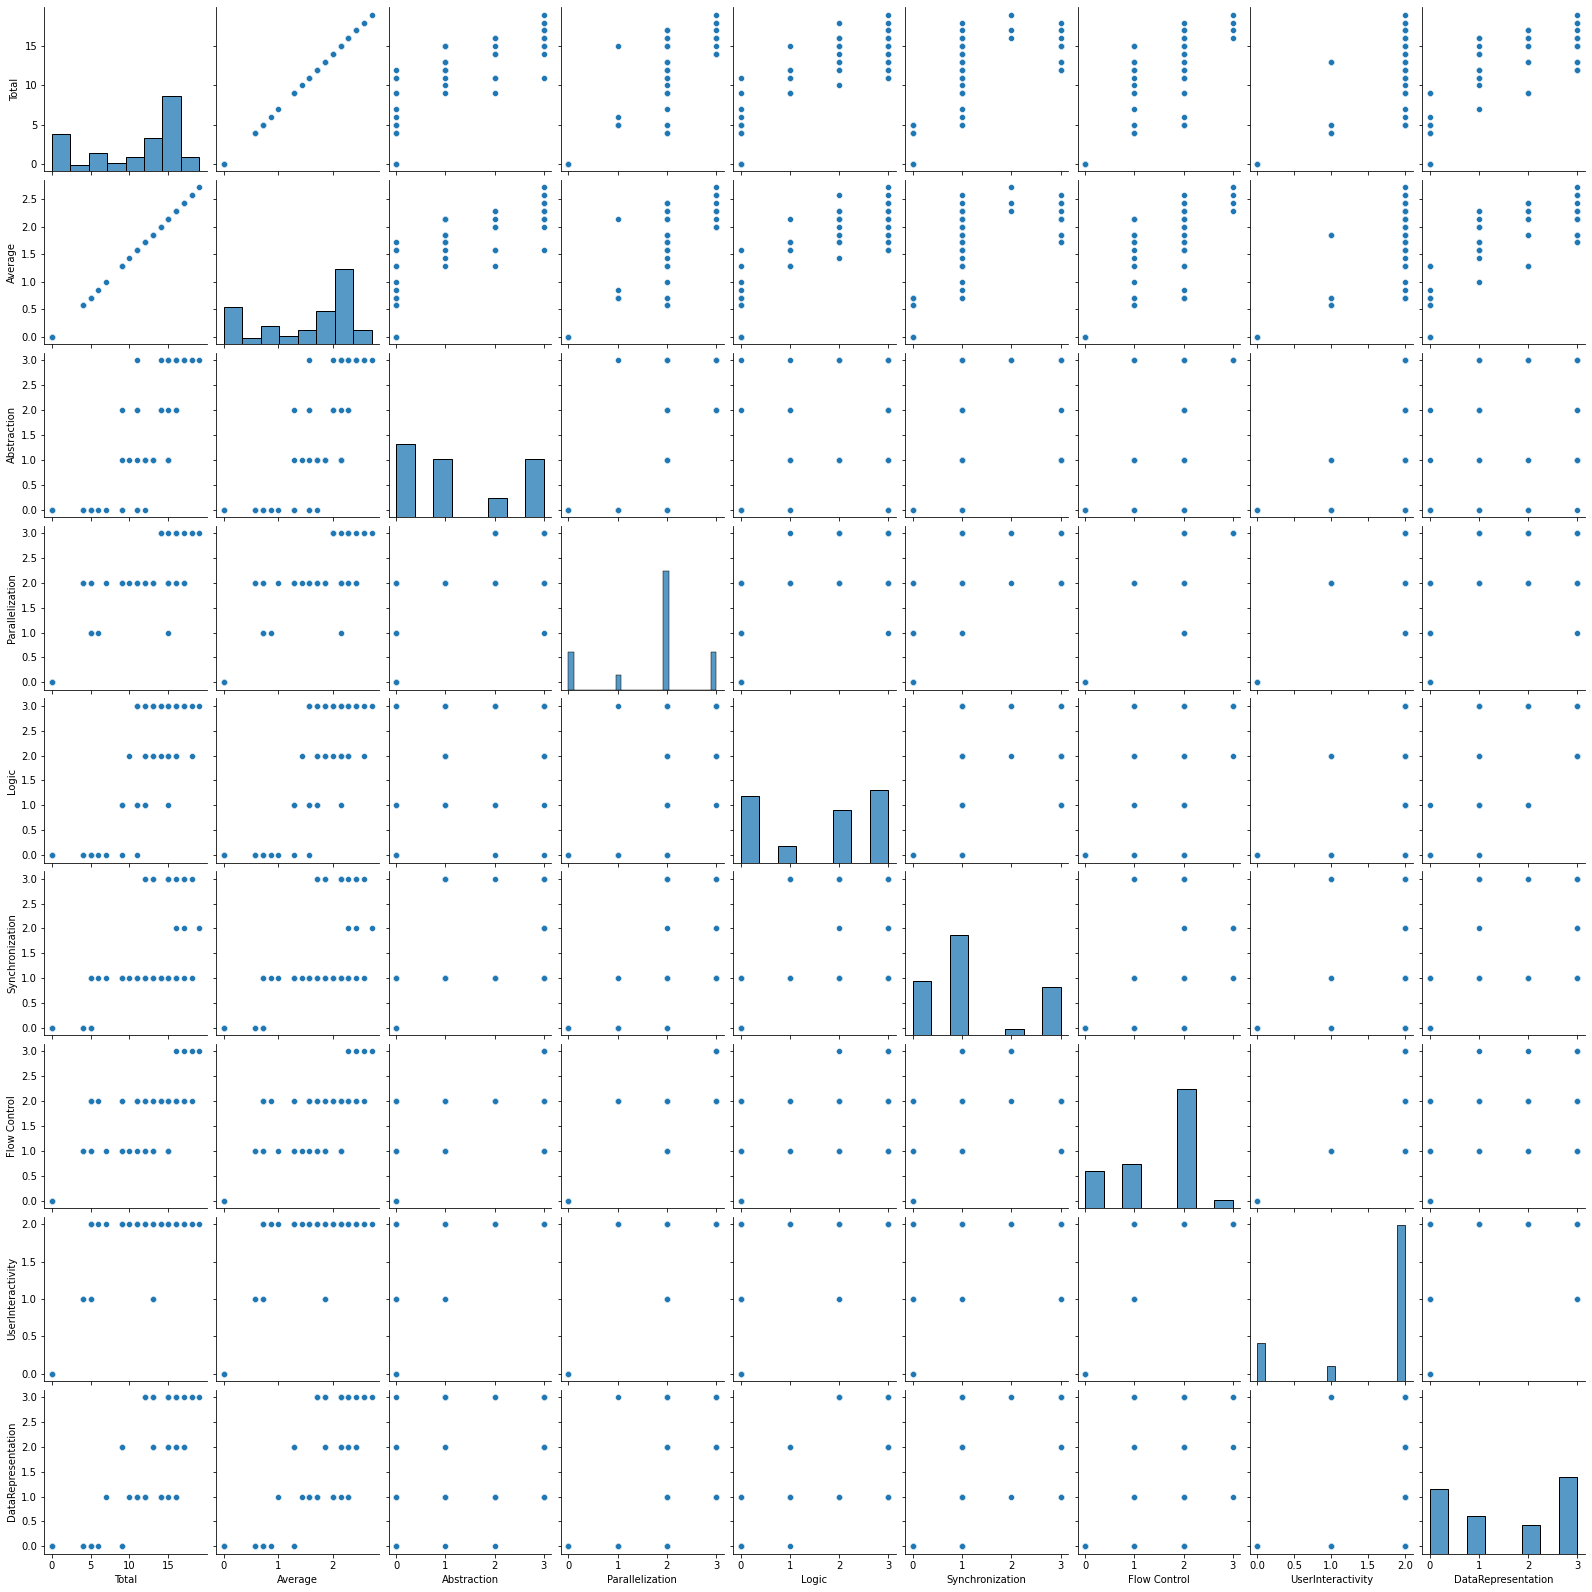

In [61]:
sns.pairplot(df_analyzer)

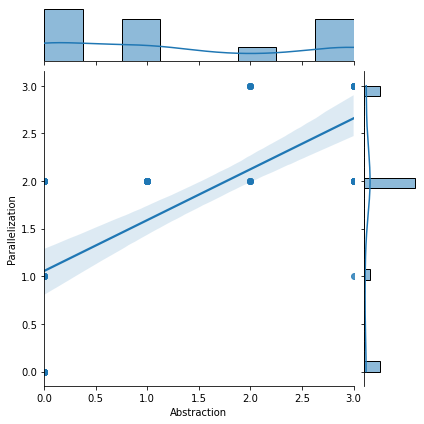

In [90]:
sns.jointplot(x='Abstraction', y='Parallelization', data=df_analyzer, kind='reg');

A partir de la representación scatter entre dos CT, obtenemos una representación de puntos que reparte sus valores entre 0 y 3 puntos, sin una relación que se aprecie a simple vista, aunque según la matriz de correlación si pueda existir cierta dependencia.

IndexError: index 9 is out of bounds for axis 1 with size 9

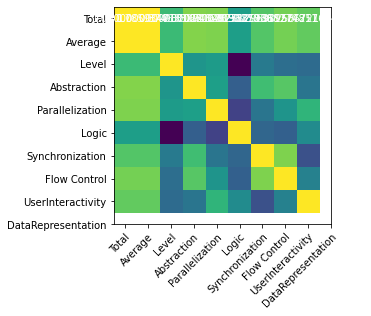

In [62]:
##Mal
corr_matrix=df_analyzer.corr().values
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
ct = df_analyzer.columns[1:]
# We want to show all ticks...
ax.set_xticks(np.arange(len(ct)))
ax.set_yticks(np.arange(len(ct)))
# ... and label them with the respective list entries
ax.set_xticklabels(ct)
ax.set_yticklabels(ct)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(ct)):
    for j in range(len(ct)):
        text = ax.text(j, i, corr_matrix[i, j],
                       ha="center", va="center", color="w")
fig.tight_layout()
plt.show()